Isolated example of bins=(int) vs bins=range()


Customer.  bins=12,  manual=False
Hist2d data
[[   7.    0.   24.   30.   28.   28.   36.   36.   36.   14.    9.    1.]
 [   7.    6.   19.   30.   29.   20.   44.   36.   39.   21.   12.    3.]
 [   9.    6.   37.   41.   62.   53.   69.   56.   49.   38.   27.    8.]
 [   6.   11.   38.   48.   61.   83.   58.   60.   60.   40.   35.   13.]
 [  10.   17.   55.   65.   81.  106.   98.  117.  108.   68.   55.   12.]
 [  26.   28.   96.  129.  173.  178.  229.  232.  270.  151.  100.   44.]
 [  40.   48.  177.  254.  293.  314.  387.  453.  427.  295.  192.   54.]
 [  72.   72.  279.  367.  465.  489.  656.  747.  731.  529.  281.  114.]
 [  78.  102.  345.  531.  692.  691.  828.  976.  942.  661.  400.  152.]
 [  78.  100.  267.  412.  496.  457.  650.  717.  665.  473.  292.  116.]
 [  80.   87.  275.  341.  418.  333.  471.  533.  597.  381.  193.   85.]
 [  32.   49.  136.  184.  218.  197.  280.  280.  298.  205.  118.   61.]]
xedges
[  1.           1.91666667   2.83333333   3.7

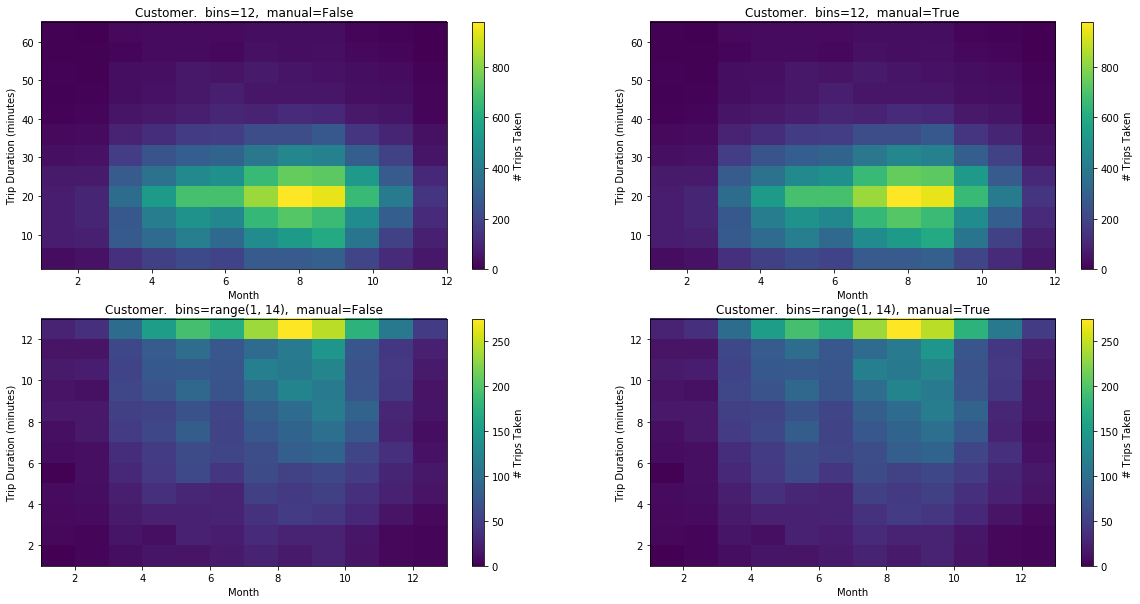

In [98]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
def hist2d_example(gs, df, bins, manual=False):
    """ gs:      location in grid this subplot will be drawn
        df:      the raw data we will graph
        bins:    either an int or range (the main pain point being illustrated)
        manual:  Set to True to call numpy's histogram2d function and use results to plot manually.
                 Set to False to use matplotlib's hist2d function
    """
    ax = plt.subplot(gs)
    plt.subplot(ax).set_title("Customer.  bins={},  manual={}".format(bins, manual))
    plt.ylabel("Trip Duration (minutes)")
    plt.xlabel('Month')
    
    x = [int(i) for i in df.month]
    y = [int(i) for i in df.duration]

    if manual == True:
        H, xedges, yedges = np.histogram2d(x, y, bins=bins)
        ax.pcolorfast(xedges, yedges, H.T)
    else:
        H, xedges, yedges, pc = plt.hist2d(x, y, bins=bins)
    plt.colorbar(label='# Trips Taken')
    print("\nCustomer.  bins={},  manual={}".format(bins, manual))
    as_graphed = np.fliplr(H).T  # organize matrix data like it appears in the graph so it reads better
    print("Hist2d data\n{}".format(as_graphed))
    print("xedges\n{}\nyedges\n{}".format(xedges,yedges))

# Config grid where plots will be drawn
fig = plt.figure(figsize=(20, 10))  # each subplot will be figsize=(w,h)
gs = gridspec.GridSpec(nrows=2, ncols=2)

# Filter data frame to include only a subset of data to demo something simple/constrained
df = pd.read_csv('./data/NYC-2016-Summary.csv')
df = df[df.user_type == 'Customer']
df = df[df.duration <  int(np.percentile(df.duration, 95))]

# illustrate issues/confusion and draw manual alongside hist2d plot to show there is no difference
bins=12
hist2d_example(gs[0], df, bins, manual=False)
hist2d_example(gs[1], df, bins, manual=True)
bins=range(1,14)
hist2d_example(gs[2], df, bins, manual=False)
hist2d_example(gs[3], df, bins, manual=True)

plt.show()

So after a bit of staring it seems the graphs are different because using range() truncates my y (duration) at 12 and i'm only seeing that range in expanded detail, and that is why the graphs are different.  But these questions sill remain.

* Why when given a range does it truncate my yedges at 12?
* Why does xedges need to be from 1 to 13 when range is used and 1 to 12 when an integer is used?  If you change the range to range(1,13) you truncate the right most column of data, and if you specify bins=13 you get an additional column of empty data in the middle of the graph.
* All I want is for my xedges to line up with the columns they represent, and stack overflow suggests using a range to accomplish this, however this caused the above mentioned issues.  Why?  There must be an easier way to accomplish this no?


